In [1]:
import utils as ut
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("ticks")
sns.set_context("talk")

%load_ext autoreload
%autoreload 2

# Load and prepare data

In [2]:
df_i, df_d, df_r, df_p = ut.import_world_data()

In [3]:
dfs = {}
for country in list(df_i['Country/Region'].unique()):
    try:
        dfs[country] = ut.Country.build(country, df_i, df_d, df_r, df_p)
        
        # Consider only countries with at least 1e6 people
        if dfs[country].population < 1e6:
            del dfs[country]
    except IndexError:
        print("Country not found in population database:", country)
        
        
# Set end dates for fit and predict.
# Start dates are always the first day of infection by default
end_fit = '2020-08-31'
end_predict = '2020-08-31'

Country not found in population database: Burma
Country not found in population database: Congo (Brazzaville)
Country not found in population database: Congo (Kinshasa)
Country not found in population database: Cote d'Ivoire
Country not found in population database: Diamond Princess
Country not found in population database: Kosovo
Country not found in population database: MS Zaandam
Country not found in population database: Palau
Country not found in population database: Saint Kitts and Nevis
Country not found in population database: Saint Vincent and the Grenadines
Country not found in population database: Sao Tome and Principe
Country not found in population database: Summer Olympics 2020
Country not found in population database: West Bank and Gaza


# SIR Naive Model

In [4]:
errors_sir = pd.DataFrame(columns = ['Susceptible', 'Infected', 'Recovered'], dtype = 'float')
for n, country in  enumerate(list(dfs.keys())):
    dfs[country].fit(method = 'sir', end = end_fit)
    shat, ihat, rhat = dfs[country].predict(end = end_predict)
    s, i, r = (dfs[country].data.loc[:end_predict, 'susceptible'], dfs[country].data.loc[:end_predict, 'infected'],
           dfs[country].data.loc[:end_predict, 'recovered'])
    errors_sir.loc[country, 'Susceptible'] = np.mean(np.abs(s-shat)/dfs[country].population)
    errors_sir.loc[country, 'Infected'] = np.mean(np.abs(i-ihat)/dfs[country].population)
    errors_sir.loc[country, 'Recovered'] = np.mean(np.abs(r-rhat)/dfs[country].population)

Errors per million inhabitants:
Susceptible 9097 +- 15894, Infected 3633 +- 5646, Recovered 5633 +- 11746


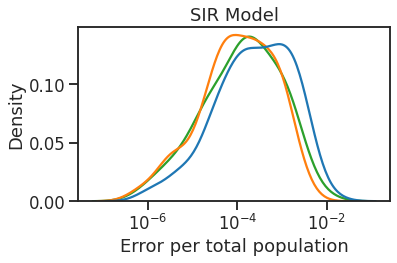

In [5]:
print("Errors per million inhabitants:\nSusceptible %.0f +- %.0f, Infected %.0f +- %.0f, Recovered %.0f +- %.0f" %(
    10e6*errors_sir.Susceptible.mean(), 10e6*errors_sir.Susceptible.std(), 10e6*errors_sir.Infected.mean(),
    10e6*errors_sir.Infected.std(), 10e6*errors_sir.Recovered.mean(), 10e6*errors_sir.Recovered.std()))
f = sns.kdeplot(data = errors_sir,  log_scale = True, legend = False)
plt.title("SIR Model")
plt.xlabel("Error per total population")
plt.tight_layout()
plt.savefig("sir_error.pdf")

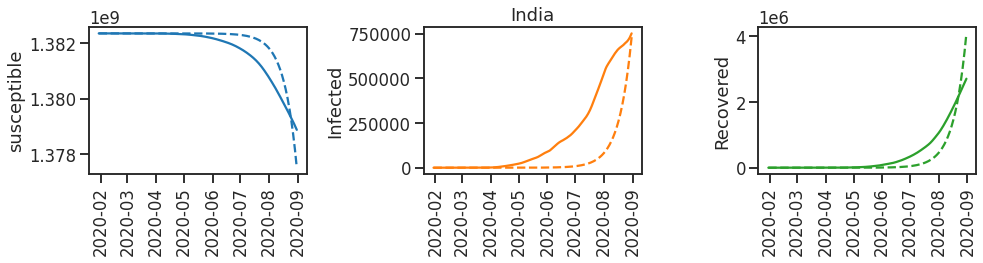

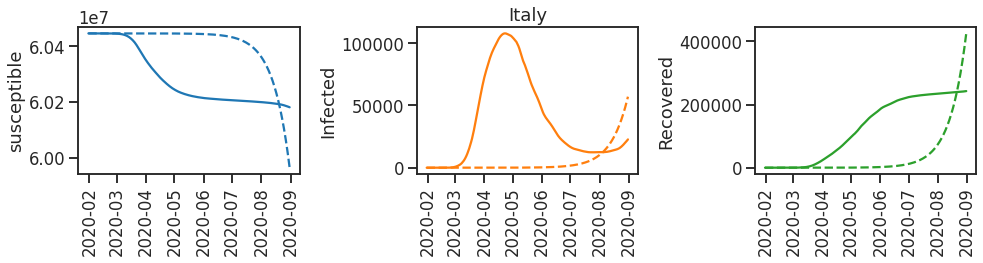

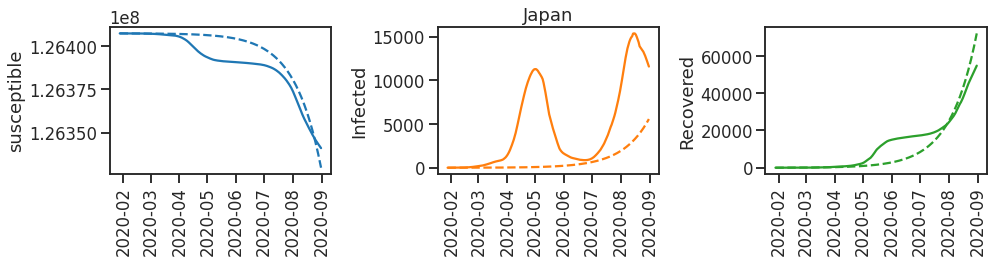

In [13]:
for country in ['India', 'Italy', 'Japan']:
    shat, ihat, rhat = dfs[country].predict(end=end_predict)
    dfs[country].plot_predictions(shat, ihat, rhat, end = end_predict)
    plt.savefig(f"{country}_sir.pdf")

# SIR with lockdowns (one variation of beta)

In [14]:
errors_sirl = pd.DataFrame(columns = ['Susceptible', 'Infected', 'Recovered'], dtype = 'float')
for n, country in  enumerate(list(dfs.keys())):
    dfs[country].fit(method = 'single_lockdown', end = end_fit)
    shat, ihat, rhat = dfs[country].predict(end = end_predict)
    s, i, r = (dfs[country].data.loc[:end_predict, 'susceptible'], dfs[country].data.loc[:end_predict, 'infected'],
           dfs[country].data.loc[:end_predict, 'recovered'])
    errors_sirl.loc[country, 'Susceptible'] = np.mean(np.abs(s-shat)/dfs[country].population)
    errors_sirl.loc[country, 'Infected'] = np.mean(np.abs(i-ihat)/dfs[country].population)
    errors_sirl.loc[country, 'Recovered'] = np.mean(np.abs(r-rhat)/dfs[country].population)

Errors per million inhabitants:
Susceptible 2142 +- 3401, Infected 2369 +- 4586, Recovered 1470 +- 2654


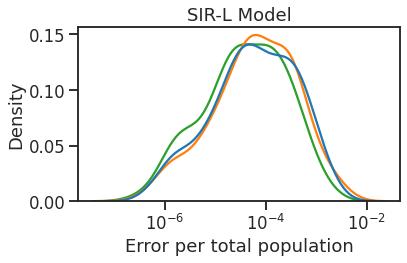

In [15]:
print("Errors per million inhabitants:\nSusceptible %.0f +- %.0f, Infected %.0f +- %.0f, Recovered %.0f +- %.0f" %(
    10e6*errors_sirl.Susceptible.mean(), 10e6*errors_sirl.Susceptible.std(), 10e6*errors_sirl.Infected.mean(),
    10e6*errors_sirl.Infected.std(), 10e6*errors_sirl.Recovered.mean(), 10e6*errors_sirl.Recovered.std()))
f = sns.kdeplot(data = errors_sirl,  log_scale = True, legend = False)
plt.title("SIR-L Model")
plt.xlabel("Error per total population")
plt.tight_layout()
plt.savefig("sirl_error.pdf")

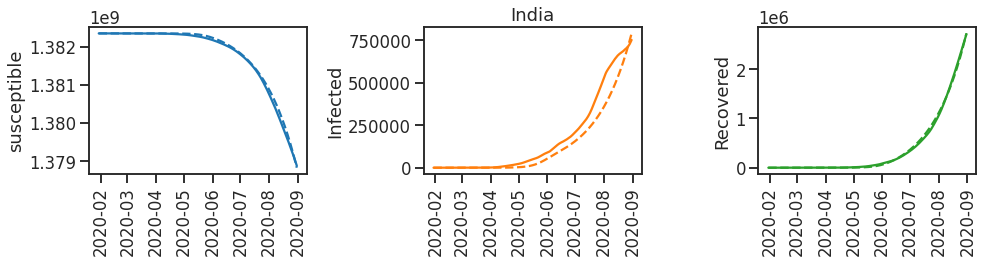

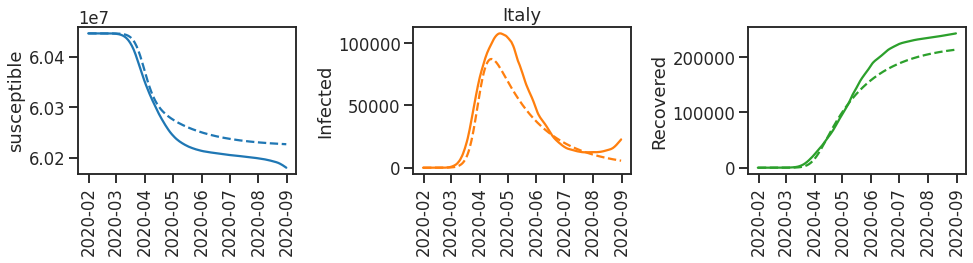

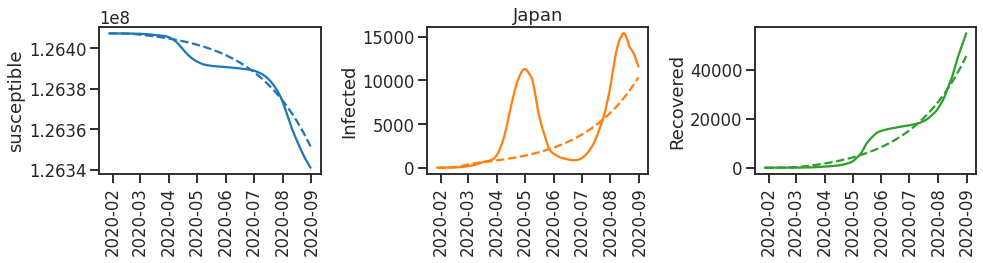

In [16]:
for country in ['India', 'Italy', 'Japan']:
    shat, ihat, rhat = dfs[country].predict(end = end_predict)
    dfs[country].plot_predictions(shat, ihat, rhat, end = end_predict)
    plt.savefig(f"{country}_sirl.pdf")

# SIR that allows for multiple variations of beta

In [17]:
errors_sirml = pd.DataFrame(columns = ['Susceptible', 'Infected', 'Recovered'], dtype = 'float')
for n, country in  enumerate(list(dfs.keys())):
    dfs[country].fit(method = 'lockdown', end = end_fit)
    shat, ihat, rhat = dfs[country].predict(end = end_predict)
    s, i, r = (dfs[country].data.loc[:end_predict, 'susceptible'], dfs[country].data.loc[:end_predict, 'infected'],
           dfs[country].data.loc[:end_predict, 'recovered'])
    errors_sirml.loc[country, 'Susceptible'] = np.mean(np.abs(s-shat)/dfs[country].population)
    errors_sirml.loc[country, 'Infected'] = np.mean(np.abs(i-ihat)/dfs[country].population)
    errors_sirml.loc[country, 'Recovered'] = np.mean(np.abs(r-rhat)/dfs[country].population)

Errors per million inhabitants:
Susceptible 2203 +- 3131, Infected 2450 +- 4597, Recovered 1570 +- 2638


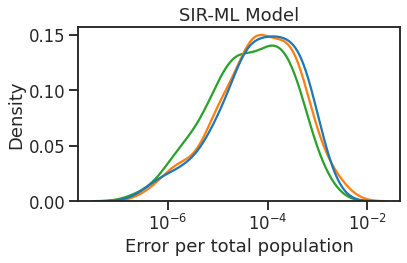

In [18]:
print("Errors per million inhabitants:\nSusceptible %.0f +- %.0f, Infected %.0f +- %.0f, Recovered %.0f +- %.0f" %(
    10e6*errors_sirml.Susceptible.mean(), 10e6*errors_sirml.Susceptible.std(), 10e6*errors_sirml.Infected.mean(),
    10e6*errors_sirml.Infected.std(), 10e6*errors_sirml.Recovered.mean(), 10e6*errors_sirml.Recovered.std()))
f = sns.kdeplot(data = errors_sirml,  log_scale = True, legend = False)
plt.title("SIR-ML Model")
plt.xlabel("Error per total population")
plt.tight_layout()
plt.savefig("sirml_error.pdf")

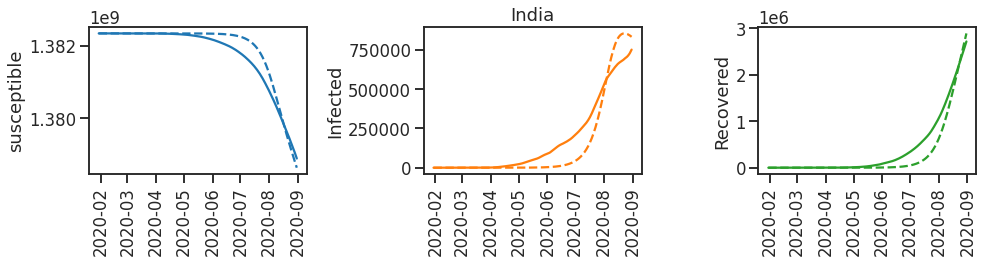

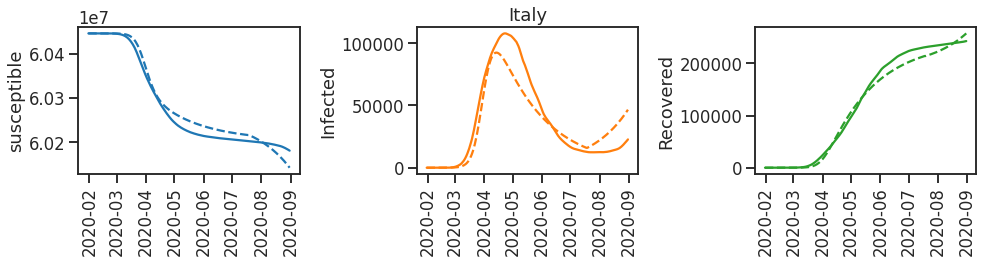

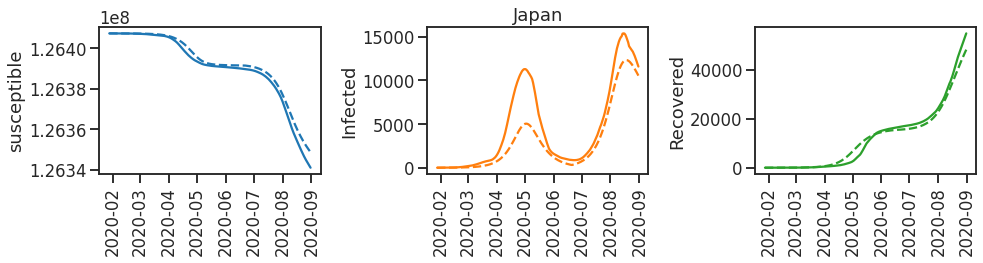

In [19]:
for country in ['India', 'Italy', 'Japan']:
    shat, ihat, rhat = dfs[country].predict(end = end_predict)
    dfs[country].plot_predictions(shat, ihat, rhat, end = end_predict)
    plt.savefig(f"{country}_sirml.pdf")